# "10 minutes to pandas"

#### Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html

In [1]:
import numpy as np
import pandas as pd



In [2]:
pd.Series([1, 3, 5, np.nan, 6, 8]) # creating Series with list of values

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [3]:
dates = pd.date_range("20130101", periods=6) # ndarray-like w/ datetime64 data aka DatetimeIndex
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
# created DataFrame with datetime index and labeled columns
# DataFrame constructor can have
# ndarray (structured or homogeneous), Iterable, dict, or DataFrame
# passed in
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))

df

,A,B,C,D
2013-01-01,0.637968,0.068108,0.872981,0.542664
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896
2013-01-03,-0.490979,0.215538,2.207978,-0.432359
2013-01-04,0.966662,0.264990,1.115123,0.652228
2013-01-05,0.042960,1.291975,0.527067,-0.711646
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825


In [5]:
# passing dict to make DataFrame
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [6]:
# some DataFrame dtypes (of df2)

df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.637968,0.068108,0.872981,0.542664
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896
2013-01-03,-0.490979,0.215538,2.207978,-0.432359
2013-01-04,0.966662,0.264990,1.115123,0.652228
2013-01-05,0.042960,1.291975,0.527067,-0.711646


In [8]:
df.tail(3) # top and bottom, yay

,A,B,C,D
2013-01-04,0.966662,0.264990,1.115123,0.652228
2013-01-05,0.042960,1.291975,0.527067,-0.711646
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825


In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.to_numpy() # dataframe into numpy ndarray (not expensive cuz all floating point)

array([[ 0.63796807,  0.06810779,  0.87298064,  0.54266369],
       [-1.04821833, -0.16646224, -1.89415502,  0.40789557],
       [-0.49097936,  0.21553838,  2.20797814, -0.43235944],
       [ 0.96666182,  0.2649901 ,  1.11512311,  0.65222834],
       [ 0.04296027,  1.29197478,  0.52706663, -0.71164589],
       [-0.30376685,  0.71931287, -0.93197839, -0.1418255 ]])

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [13]:
df.describe() # data sum

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.032562,0.398910,0.316169,0.052826
std,0.744180,0.525520,1.484264,0.562674
min,-1.048218,-0.166462,-1.894155,-0.711646
25%,-0.444176,0.104965,-0.567217,-0.359726
50%,-0.130403,0.240264,0.700024,0.133035
75%,0.489216,0.605732,1.054587,0.508972
max,0.966662,1.291975,2.207978,0.652228


In [14]:
df.T # transpose

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,0.637968,-1.048218,-0.490979,0.966662,0.042960,-0.303767
B,0.068108,-0.166462,0.215538,0.264990,1.291975,0.719313
C,0.872981,-1.894155,2.207978,1.115123,0.527067,-0.931978
D,0.542664,0.407896,-0.432359,0.652228,-0.711646,-0.141825


In [15]:
df.sort_index(axis=1, ascending=False) # let's sort the axis (flip the cols :o)

,D,C,B,A
2013-01-01,0.542664,0.872981,0.068108,0.637968
2013-01-02,0.407896,-1.894155,-0.166462,-1.048218
2013-01-03,-0.432359,2.207978,0.215538,-0.490979
2013-01-04,0.652228,1.115123,0.264990,0.966662
2013-01-05,-0.711646,0.527067,1.291975,0.042960
2013-01-06,-0.141825,-0.931978,0.719313,-0.303767


In [16]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896
2013-01-01,0.637968,0.068108,0.872981,0.542664
2013-01-03,-0.490979,0.215538,2.207978,-0.432359
2013-01-04,0.966662,0.264990,1.115123,0.652228
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825
2013-01-05,0.042960,1.291975,0.527067,-0.711646


In [17]:
df["A"]

2013-01-01    0.637968
2013-01-02   -1.048218
2013-01-03   -0.490979
2013-01-04    0.966662
2013-01-05    0.042960
2013-01-06   -0.303767
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,0.637968,0.068108,0.872981,0.542664
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896
2013-01-03,-0.490979,0.215538,2.207978,-0.432359


In [19]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896
2013-01-03,-0.490979,0.215538,2.207978,-0.432359
2013-01-04,0.966662,0.264990,1.115123,0.652228


In [20]:
df.loc[dates[0]]

A    0.637968
B    0.068108
C    0.872981
D    0.542664
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,0.637968,0.068108
2013-01-02,-1.048218,-0.166462
2013-01-03,-0.490979,0.215538
2013-01-04,0.966662,0.264990
2013-01-05,0.042960,1.291975
2013-01-06,-0.303767,0.719313


In [22]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-1.048218,-0.166462
2013-01-03,-0.490979,0.215538
2013-01-04,0.966662,0.264990


In [23]:
df.loc["20130102", ["A", "B"]]

A   -1.048218
B   -0.166462
Name: 2013-01-02 00:00:00, dtype: float64

In [24]:
df.loc[dates[0], "A"]

0.6379680728450431

In [25]:
df.at[dates[0], "A"] # faster to get scalar than previous line

0.6379680728450431

In [26]:
df.iloc[3]

A    0.966662
B    0.264990
C    1.115123
D    0.652228
Name: 2013-01-04 00:00:00, dtype: float64

In [27]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.966662,0.264990
2013-01-05,0.042960,1.291975


In [28]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-1.048218,-1.894155
2013-01-03,-0.490979,2.207978
2013-01-05,0.042960,0.527067


In [29]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896
2013-01-03,-0.490979,0.215538,2.207978,-0.432359


In [30]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.068108,0.872981
2013-01-02,-0.166462,-1.894155
2013-01-03,0.215538,2.207978
2013-01-04,0.264990,1.115123
2013-01-05,1.291975,0.527067
2013-01-06,0.719313,-0.931978


In [31]:
df.iloc[1, 1]

-0.16646223956376774

In [32]:
df.iat[1, 1] # faster for getting scalar than previous line

-0.16646223956376774

### boolean indexing

In [33]:
df[df["A"] > 0] # select whichever rows have A column value greater than 0

,A,B,C,D
2013-01-01,0.637968,0.068108,0.872981,0.542664
2013-01-04,0.966662,0.264990,1.115123,0.652228
2013-01-05,0.042960,1.291975,0.527067,-0.711646


In [34]:
df[df > 0] # select whichever values in the dataframe are positive

,A,B,C,D
2013-01-01,0.637968,0.068108,0.872981,0.542664
2013-01-02,NaN,NaN,NaN,0.407896
2013-01-03,NaN,0.215538,2.207978,NaN
2013-01-04,0.966662,0.264990,1.115123,0.652228
2013-01-05,0.042960,1.291975,0.527067,NaN
2013-01-06,NaN,0.719313,NaN,NaN


In [35]:
df2 = df.copy()

df2["E"] = ["one", "one", "two", "three", "four", "three"]

df2

,A,B,C,D,E
2013-01-01,0.637968,0.068108,0.872981,0.542664,one
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896,one
2013-01-03,-0.490979,0.215538,2.207978,-0.432359,two
2013-01-04,0.966662,0.264990,1.115123,0.652228,three
2013-01-05,0.042960,1.291975,0.527067,-0.711646,four
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825,three


In [36]:
df2[df2["E"].isin(["two", "four"])] # select rows that have column E value in the list
                                    # passed into .isin()

,A,B,C,D,E
2013-01-03,-0.490979,0.215538,2.207978,-0.432359,two
2013-01-05,0.042960,1.291975,0.527067,-0.711646,four


In [37]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [38]:
df["F"] = s1 # adding column aligns new column in DataFrame with the indices

df

,A,B,C,D,F
2013-01-01,0.637968,0.068108,0.872981,0.542664,NaN
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896,1.0
2013-01-03,-0.490979,0.215538,2.207978,-0.432359,2.0
2013-01-04,0.966662,0.264990,1.115123,0.652228,3.0
2013-01-05,0.042960,1.291975,0.527067,-0.711646,4.0
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825,5.0


In [39]:
df.at[dates[0], "A"] = 0 # setting values by label

df

,A,B,C,D,F
2013-01-01,0.000000,0.068108,0.872981,0.542664,NaN
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896,1.0
2013-01-03,-0.490979,0.215538,2.207978,-0.432359,2.0
2013-01-04,0.966662,0.264990,1.115123,0.652228,3.0
2013-01-05,0.042960,1.291975,0.527067,-0.711646,4.0
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825,5.0


In [40]:
df.iat[0, 1] = 0 # setting values by position

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.872981,0.542664,NaN
2013-01-02,-1.048218,-0.166462,-1.894155,0.407896,1.0
2013-01-03,-0.490979,0.215538,2.207978,-0.432359,2.0
2013-01-04,0.966662,0.264990,1.115123,0.652228,3.0
2013-01-05,0.042960,1.291975,0.527067,-0.711646,4.0
2013-01-06,-0.303767,0.719313,-0.931978,-0.141825,5.0


In [41]:
df.loc[:, "D"] = np.array([5] * len(df)) # assigning numpy array to column

df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.872981,5,NaN
2013-01-02,-1.048218,-0.166462,-1.894155,5,1.0
2013-01-03,-0.490979,0.215538,2.207978,5,2.0
2013-01-04,0.966662,0.264990,1.115123,5,3.0
2013-01-05,0.042960,1.291975,0.527067,5,4.0
2013-01-06,-0.303767,0.719313,-0.931978,5,5.0


In [42]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.872981,-5,NaN
2013-01-02,-1.048218,-0.166462,-1.894155,-5,-1.0
2013-01-03,-0.490979,-0.215538,-2.207978,-5,-2.0
2013-01-04,-0.966662,-0.264990,-1.115123,-5,-3.0
2013-01-05,-0.042960,-1.291975,-0.527067,-5,-4.0
2013-01-06,-0.303767,-0.719313,-0.931978,-5,-5.0


### missing data

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"]) # reindex along axes
                                                                     # returns copy of the data

df1.loc[dates[0] : dates[1], "E"] = 1

df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.872981,5,NaN,1.0
2013-01-02,-1.048218,-0.166462,-1.894155,5,1.0,1.0
2013-01-03,-0.490979,0.215538,2.207978,5,2.0,NaN
2013-01-04,0.966662,0.264990,1.115123,5,3.0,NaN


In [44]:
df1.dropna(how="any") # bye bye any rows w/ missing data

,A,B,C,D,F,E
2013-01-02,-1.048218,-0.166462,-1.894155,5,1.0,1.0


In [45]:
df1.fillna(value=5) # fill in missing data

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.872981,5,5.0,1.0
2013-01-02,-1.048218,-0.166462,-1.894155,5,1.0,1.0
2013-01-03,-0.490979,0.215538,2.207978,5,2.0,5.0
2013-01-04,0.966662,0.264990,1.115123,5,3.0,5.0


In [46]:
pd.isna(df1) # boolean mask where vals are nan

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### stats

In [47]:
df.mean() # mean across axis 0 of DataFrame (across rows)

A   -0.138890
B    0.387559
C    0.316169
D    5.000000
F    3.000000
dtype: float64

In [48]:
df.mean(1) # mean ACROSS another axis (in this case, across columns)

2013-01-01    1.468245
2013-01-02    0.578233
2013-01-03    1.786507
2013-01-04    2.069355
2013-01-05    2.172400
2013-01-06    1.896714
Freq: D, dtype: float64

In [49]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.872981,5,NaN
2013-01-02,-1.048218,-0.166462,-1.894155,5,1.0
2013-01-03,-0.490979,0.215538,2.207978,5,2.0
2013-01-04,0.966662,0.264990,1.115123,5,3.0
2013-01-05,0.042960,1.291975,0.527067,5,4.0
2013-01-06,-0.303767,0.719313,-0.931978,5,5.0


In [51]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.490979,-0.784462,1.207978,4.0,1.0
2013-01-04,-2.033338,-2.735010,-1.884877,2.0,0.0
2013-01-05,-4.957040,-3.708025,-4.472933,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.872981,5,NaN
2013-01-02,-1.048218,-0.166462,-1.021174,10,1.0
2013-01-03,-1.539198,0.049076,1.186804,15,3.0
2013-01-04,-0.572536,0.314066,2.301927,20,6.0
2013-01-05,-0.529576,1.606041,2.828994,25,10.0
2013-01-06,-0.833342,2.325354,1.897015,30,15.0


In [53]:
df.apply(lambda x: x.max() - x.min())

A    2.014880
B    1.458437
C    4.102133
D    0.000000
F    4.000000
dtype: float64

### histogramming

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))

s

0    0
1    3
2    6
3    4
4    5
5    5
6    6
7    0
8    2
9    3
dtype: int64

In [55]:
s.value_counts() # makin' a histogram

0    2
3    2
5    2
6    2
2    1
4    1
dtype: int64

### string methods

In [56]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### merge

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))

df

,0,1,2,3
0,-0.263240,-1.480094,0.555199,-0.833361
1,-0.676998,1.750789,0.893321,0.155112
2,-0.769613,-0.231509,-0.913744,0.647798
3,0.478223,-0.881602,-0.232891,-0.150508
4,-1.614006,0.986162,0.385199,-0.296409
5,-0.402172,0.008227,-0.155003,0.084680
6,0.540240,0.204753,0.114487,2.942092
7,0.212159,-0.700227,0.131742,0.116072
8,-0.074998,0.255886,-0.197842,-1.247865
9,-0.508384,-0.484643,0.172747,-0.057430


In [58]:
# break into pieces
pieces = [df[:3], df[3:7], df[7:]]

pieces

[          0         1         2         3
 0 -0.263240 -1.480094  0.555199 -0.833361
 1 -0.676998  1.750789  0.893321  0.155112
 2 -0.769613 -0.231509 -0.913744  0.647798,
           0         1         2         3
 3  0.478223 -0.881602 -0.232891 -0.150508
 4 -1.614006  0.986162  0.385199 -0.296409
 5 -0.402172  0.008227 -0.155003  0.084680
 6  0.540240  0.204753  0.114487  2.942092,
           0         1         2         3
 7  0.212159 -0.700227  0.131742  0.116072
 8 -0.074998  0.255886 -0.197842 -1.247865
 9 -0.508384 -0.484643  0.172747 -0.057430]

In [59]:
# concat back together!
pd.concat(pieces)

,0,1,2,3
0,-0.263240,-1.480094,0.555199,-0.833361
1,-0.676998,1.750789,0.893321,0.155112
2,-0.769613,-0.231509,-0.913744,0.647798
3,0.478223,-0.881602,-0.232891,-0.150508
4,-1.614006,0.986162,0.385199,-0.296409
5,-0.402172,0.008227,-0.155003,0.084680
6,0.540240,0.204753,0.114487,2.942092
7,0.212159,-0.700227,0.131742,0.116072
8,-0.074998,0.255886,-0.197842,-1.247865
9,-0.508384,-0.484643,0.172747,-0.057430


In [60]:
# fun fact: adding column to DF is fast; adding row requires copy (expensive)

### join

In [61]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

left

,key,lval
0,foo,1
1,foo,2


In [62]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [64]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

left

,key,lval
0,foo,1
1,bar,2


In [65]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


### grouping
1. splitting (into groups based on criteria)
2. applying (function to each group)
3. combining (results into one structure)

In [67]:
df = pd.DataFrame({
                    "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
                    "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
                    "C": np.random.randn(8),
                    "D": np.random.randn(8),
})

df

,A,B,C,D
0,foo,one,-0.582730,0.052310
1,bar,one,0.550921,1.120249
2,foo,two,2.218580,-0.509492
3,bar,three,-0.450561,0.728527
4,foo,two,0.406815,0.021565
5,bar,two,-1.726845,1.575683
6,foo,one,-1.233771,-1.324462
7,foo,three,0.038014,0.283084


In [68]:
0.867052 + 1.570659 + 0.865581 + 1.063402 + 0.791839 # should be sum of C foo vals

5.158533

In [69]:
df.groupby("A").sum()

,C,D
A,,
bar,-1.626485,3.424460
foo,0.846908,-1.476994


In [70]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.550921  1.120249
    three -0.450561  0.728527
    two   -1.726845  1.575683
foo one   -1.816501 -1.272152
    three  0.038014  0.283084
    two    2.625395 -0.487927

In [71]:
# above, foo one's should be 
0.867052 + 1.063402

1.9304540000000001

In [72]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
))

In [73]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [74]:
## quick break to explore packing
a = [[1, 2], [3, 4]]
print(type(a))
print(a)
print(list(zip(*a)))

<class 'list'>
[[1, 2], [3, 4]]
[(1, 3), (2, 4)]


In [75]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [76]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df

A         B
first second                    
bar   one    -1.339792 -0.870376
      two    -0.826602 -1.802300
baz   one    -1.755034 -1.086719
      two     0.629818  0.709322
foo   one     0.035101  0.432326
      two    -0.741218  0.373110
qux   one    -1.016306 -0.539721
      two    -1.131462  0.653784

In [77]:
df2 = df[:4]

df2

A         B
first second                    
bar   one    -1.339792 -0.870376
      two    -0.826602 -1.802300
baz   one    -1.755034 -1.086719
      two     0.629818  0.709322

In [78]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -1.339792
               B   -0.870376
       two     A   -0.826602
               B   -1.802300
baz    one     A   -1.755034
               B   -1.086719
       two     A    0.629818
               B    0.709322
dtype: float64

In [79]:
stacked.unstack()

A         B
first second                    
bar   one    -1.339792 -0.870376
      two    -0.826602 -1.802300
baz   one    -1.755034 -1.086719
      two     0.629818  0.709322

In [80]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.339792 -0.826602
      B -0.870376 -1.802300
baz   A -1.755034  0.629818
      B -1.086719  0.709322

In [81]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.339792 -1.755034
       B -0.870376 -1.086719
two    A -0.826602  0.629818
       B -1.802300  0.709322

### pivot tables

In [82]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

df

,A,B,C,D,E
0,one,A,foo,-0.763894,0.374531
1,one,B,foo,0.522532,-0.422291
2,two,C,foo,-0.816353,0.102017
3,three,A,bar,1.413792,-0.062580
4,one,B,bar,1.218393,-1.361806
5,one,C,bar,1.406522,1.227053
6,two,A,foo,1.730632,-1.119208
7,three,B,foo,-2.634339,-1.755443
8,one,C,foo,1.099974,-0.461469
9,one,A,bar,0.121724,-2.705076


In [83]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.121724 -0.763894
      B  1.218393  0.522532
      C  1.406522  1.099974
three A  1.413792       NaN
      B       NaN -2.634339
      C  0.375259       NaN
two   A       NaN  1.730632
      B -0.235146       NaN
      C       NaN -0.816353

### time series

In [84]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [85]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts

2012-01-01 00:00:00    150
2012-01-01 00:00:01    228
2012-01-01 00:00:02    455
2012-01-01 00:00:03     61
2012-01-01 00:00:04    246
                      ... 
2012-01-01 00:01:35    375
2012-01-01 00:01:36     87
2012-01-01 00:01:37    426
2012-01-01 00:01:38    445
2012-01-01 00:01:39    214
Freq: S, Length: 100, dtype: int64

In [86]:
ts.resample("5Min").sum()

2012-01-01    26680
Freq: 5T, dtype: int64

In [87]:
rng = pd.date_range("3/6/2012 0:00", periods=5, freq="D")

rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [88]:
ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.571732
2012-03-07   -0.095914
2012-03-08   -0.820624
2012-03-09    1.138178
2012-03-10    0.861053
Freq: D, dtype: float64

In [89]:
ts_utc = ts.tz_localize("UTC")

ts_utc

2012-03-06 00:00:00+00:00    0.571732
2012-03-07 00:00:00+00:00   -0.095914
2012-03-08 00:00:00+00:00   -0.820624
2012-03-09 00:00:00+00:00    1.138178
2012-03-10 00:00:00+00:00    0.861053
Freq: D, dtype: float64

In [90]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.571732
2012-03-06 19:00:00-05:00   -0.095914
2012-03-07 19:00:00-05:00   -0.820624
2012-03-08 19:00:00-05:00    1.138178
2012-03-09 19:00:00-05:00    0.861053
Freq: D, dtype: float64

In [91]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")

rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [92]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31    0.949310
2012-02-29   -0.379293
2012-03-31   -0.545700
2012-04-30   -0.625549
2012-05-31   -0.269710
Freq: M, dtype: float64

In [93]:
ps = ts.to_period()

ps

2012-01    0.949310
2012-02   -0.379293
2012-03   -0.545700
2012-04   -0.625549
2012-05   -0.269710
Freq: M, dtype: float64

In [94]:
ps.to_timestamp()

2012-01-01    0.949310
2012-02-01   -0.379293
2012-03-01   -0.545700
2012-04-01   -0.625549
2012-05-01   -0.269710
Freq: MS, dtype: float64

In [95]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [96]:
ts = pd.Series(np.random.randn(len(prng)), prng)

ts

1990Q1    1.884241
1990Q2    0.850151
1990Q3    0.986514
1990Q4   -0.846787
1991Q1   -0.161993
1991Q2    1.177309
1991Q3   -0.159145
1991Q4   -1.804786
1992Q1   -0.205861
1992Q2    0.409396
1992Q3    0.412154
1992Q4    1.176917
1993Q1    0.375359
1993Q2    0.813840
1993Q3    1.049809
1993Q4    0.451425
1994Q1    0.737322
1994Q2   -0.288319
1994Q3    1.035489
1994Q4   -0.058213
1995Q1   -0.219923
1995Q2    1.028876
1995Q3    0.157644
1995Q4    0.407981
1996Q1   -0.933836
1996Q2    0.847524
1996Q3   -0.387332
1996Q4   -0.489631
1997Q1   -0.736505
1997Q2    0.791364
1997Q3    0.419408
1997Q4   -0.377236
1998Q1   -0.384398
1998Q2    0.189761
1998Q3   -1.138018
1998Q4    0.599532
1999Q1    0.022494
1999Q2   -0.082959
1999Q3    0.525935
1999Q4   -1.372702
2000Q1   -0.567860
2000Q2   -1.098616
2000Q3   -1.150270
2000Q4   -0.324105
Freq: Q-NOV, dtype: float64

In [97]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

ts.head()

1990-03-01 09:00    1.884241
1990-06-01 09:00    0.850151
1990-09-01 09:00    0.986514
1990-12-01 09:00   -0.846787
1991-03-01 09:00   -0.161993
Freq: H, dtype: float64

In [98]:
df = pd.DataFrame({"id": [1,2,3,4,5,6], "raw_grade": ["a", "b", "b", "a", "a", "e"]})

df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [99]:
df["grade"] = df["raw_grade"].astype("category")

df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [100]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [101]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])

df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [102]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [103]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

### plotting

In [104]:
import matplotlib.pyplot as plt

plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts

2000-01-01   -0.768981
2000-01-02    0.652626
2000-01-03    2.216808
2000-01-04    0.661995
2000-01-05    0.561491
                ...   
2002-09-22   -1.116499
2002-09-23    0.019018
2002-09-24   -0.650647
2002-09-25    1.939738
2002-09-26    0.374317
Freq: D, Length: 1000, dtype: float64

In [105]:
ts = ts.cumsum()

ts

2000-01-01   -0.768981
2000-01-02   -0.116356
2000-01-03    2.100453
2000-01-04    2.762448
2000-01-05    3.323938
                ...   
2002-09-22   -2.391882
2002-09-23   -2.372864
2002-09-24   -3.023511
2002-09-25   -1.083773
2002-09-26   -0.709455
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

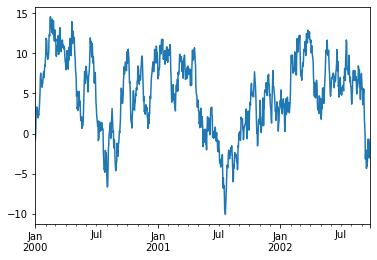

In [106]:
ts.plot()

In [107]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df

,A,B,C,D
2000-01-01,0.530317,-0.160376,-1.379105,-0.473620
2000-01-02,-0.096910,0.576529,0.533259,0.116997
2000-01-03,1.736035,-1.148323,-0.274095,0.703104
2000-01-04,1.173166,1.318757,-1.521157,-1.127495
2000-01-05,0.242112,-0.709053,-0.991477,-1.090487
...,...,...,...,...
2002-09-22,0.606295,-1.315398,-0.689381,-1.664032
2002-09-23,-1.433847,-1.527098,0.453975,-1.445028
2002-09-24,-0.068325,1.000242,-1.203404,1.195776
2002-09-25,0.241334,0.381759,-0.653515,0.525649


In [108]:
df = df.cumsum()

df

,A,B,C,D
2000-01-01,0.530317,-0.160376,-1.379105,-0.473620
2000-01-02,0.433407,0.416153,-0.845845,-0.356623
2000-01-03,2.169442,-0.732170,-1.119941,0.346481
2000-01-04,3.342608,0.586587,-2.641097,-0.781014
2000-01-05,3.584720,-0.122466,-3.632575,-1.871500
...,...,...,...,...
2002-09-22,20.400550,15.220612,-32.061033,-19.743108
2002-09-23,18.966703,13.693514,-31.607057,-21.188136
2002-09-24,18.898378,14.693756,-32.810462,-19.992360
2002-09-25,19.139712,15.075516,-33.463977,-19.466711


In [109]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

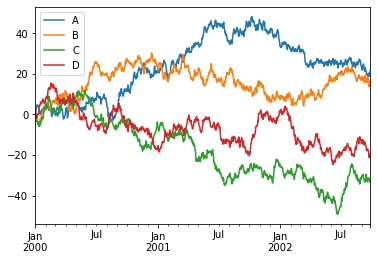

In [110]:
df.plot()

No handles with labels found to put in legend.


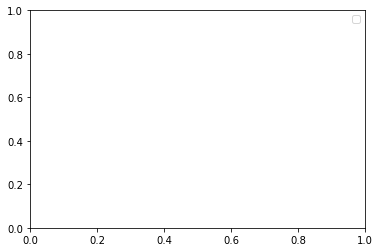

In [111]:
# not working due to different package versions
plt.legend(loc='best')

### csv

In [112]:
df.to_csv("foo.csv")

In [113]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.530317,-0.160376,-1.379105,-0.473620
1,2000-01-02,0.433407,0.416153,-0.845845,-0.356623
2,2000-01-03,2.169442,-0.732170,-1.119941,0.346481
3,2000-01-04,3.342608,0.586587,-2.641097,-0.781014
4,2000-01-05,3.584720,-0.122466,-3.632575,-1.871500
...,...,...,...,...,...
995,2002-09-22,20.400550,15.220612,-32.061033,-19.743108
996,2002-09-23,18.966703,13.693514,-31.607057,-21.188136
997,2002-09-24,18.898378,14.693756,-32.810462,-19.992360
998,2002-09-25,19.139712,15.075516,-33.463977,-19.466711


### HDFS: lower priority right now

### Excel

In [115]:
# not working due to different package versions

df.to_excel("foo.xlsx", sheet_name="Sheet1")

pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

ModuleNotFoundError: No module named 'openpyxl'